In [24]:
import numpy as np
from scipy.io import loadmat
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.colors as colors
import seaborn as sns
import itertools
from scipy.stats import norm
import scipy.stats
from sklearn.naive_bayes import GaussianNB
import scipy.io
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [25]:
columnsName = ['Feature1','Feature2']
classA = pd.DataFrame(loadmat("classA.mat")['classA'],columns = columnsName)
classB = pd.DataFrame(loadmat("classB.mat")['classB'],columns = columnsName)

In [26]:
#Merge data
classAB = pd.concat([classA,classB], keys=['A', 'B']).reset_index().drop('level_1', 
                                    axis=1).rename(columns = {'level_0': 'Class'})
classAB

,Class,Feature1,Feature2
0,A,0.572257,2.179579
1,A,0.420627,1.752968
2,A,1.925968,1.484078
3,A,1.005510,1.775438
4,A,0.365509,0.943339
...,...,...,...
490,B,-2.693473,-0.915239
491,B,0.096442,-0.914822
492,B,-1.057384,1.074750
493,B,-0.808107,-0.135698


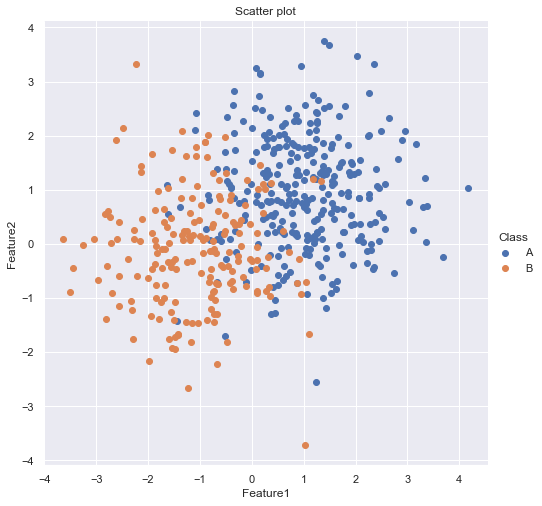

In [28]:
#Plot data
# sns.set()
sns.FacetGrid(classAB, hue="Class", height=7).map(plt.scatter,"Feature1","Feature2",).add_legend()
plt.title('Scatter plot')
plt.show()

In [30]:
#Estimating the data
nA = len(classA)
nB = len(classB)
print("Số mẫu của class A là :",nA)
print("Số mẫu của class B là :",nB)

Số mẫu của class A là : 300
Số mẫu của class B là : 195


In [31]:
#Split train and test
train_set, test_set = train_test_split(classAB, train_size=0.7)
print("Số lượng của tập train là :",len(train_set))
print("Số lượng của tập train là :",len(test_set))

Số lượng của tập train là : 346
Số lượng của tập train là : 149


In [19]:
#Estimating the parameters
mu_list = np.split(train_set.groupby('Class').mean().values,[1])
# cov_list = np.split(np.array([1,0,0,1]*2).reshape(-1,2),[2])
cov_list = np.split(train_set.groupby('Class').cov().values,[2])
pi_list = train_set.iloc[:,0].value_counts().values / len(train_set)
print("Mean của từng class A trong train set là : ",mu_list[0][0])
print("Mean của từng class B trong train set là : ",mu_list[1][0])

Mean của từng class A trong train set là :  [1.02409221 0.89535824]
Mean của từng class B trong train set là :  [-1.02802323 -0.11705038]


In [20]:
#Build discriminant functions

def DF(X,mu_list,cov_list,pi_list):
  scores_list = []
  classes = len(mu_list)
  for p in range(classes):
    Wi = (-1/2)*np.linalg.inv(cov_list[p])
    wi = np.linalg.inv(cov_list[p])@mu_list[p][0]
    wi0 = (-1/2)*np.transpose(mu_list[p][0])@np.linalg.inv(cov_list[p])@mu_list[p][0]
    + (-1/2)*np.log(np.linalg.norm(cov_list[p])) 
    + np.log(pi_list[p])
    score = np.transpose(X)@Wi@X + np.transpose(wi)@X + wi0
    # print(np.transpose(X)@Wi@X)
    scores_list.append(score)
  # print(scores_list)
  return np.argmax(scores_list)

In [21]:
#Confusion matrix
prediction = ["A" if DF(np.array([x,y]).reshape(-1,1),mu_list, cov_list, pi_list)==0 else "B" 
                                      for x, y in test_set[["Feature1","Feature2"]].values]
label = list(test_set['Class'].values)
print(pd.DataFrame(confusion_matrix(label, prediction), index=['Class A', 'Class B'], 
                                                       columns=['Class A', 'Class B']))

         Class A  Class B
Class A       82       13
Class B        4       50


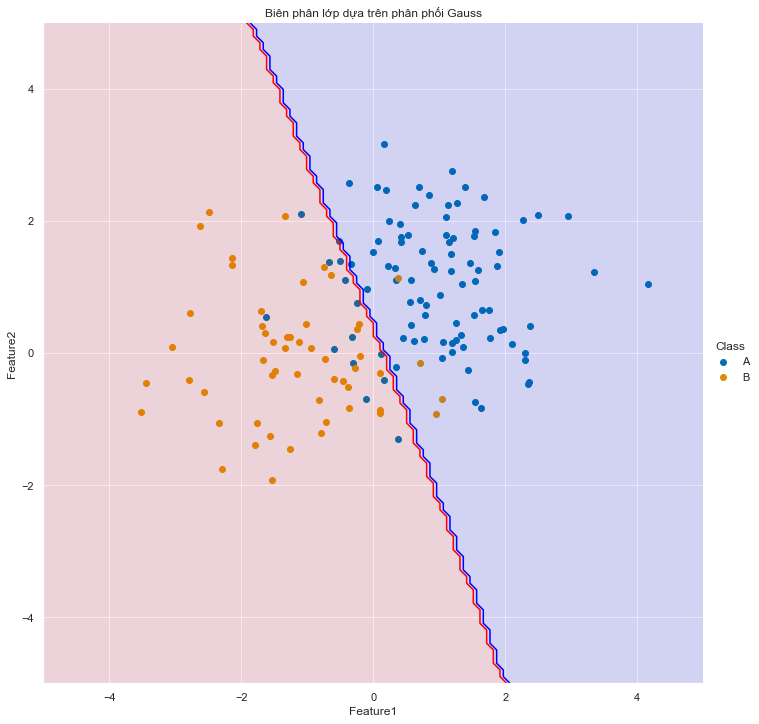

In [22]:
#Plot with boundary contours
N = 100
X = np.linspace(-5, 5, N)
Y = np.linspace(-5, 5, N)
X, Y = np.meshgrid(X, Y)

#Configure plot
color_list = ['Blues','Reds']
g = sns.FacetGrid(test_set, hue="Class", height=10, palette = 'colorblind', hue_order=["A","B"]).map(plt.scatter,
                                                                            "Feature1","Feature2",).add_legend()
my_ax = g.ax

#Computing the predicted class function for each value on the grid
zz = np.array( [DF( np.array([xx,yy]).reshape(-1,1),mu_list, cov_list, pi_list) for xx, yy in zip(np.ravel(X), 
                                                                                                  np.ravel(Y)) ] )
# zz = np.array( [predict_NB_gaussian_class( np.array([xx,yy]).reshape(-1,1),mu_list, std_list, pi_list) 
# for xx, yy in zip(np.ravel(X), np.ravel(Y)) ] )

#Reshaping the predicted class into the meshgrid shape
Z = zz.reshape(X.shape)

#Plot the filled and boundary contours
my_ax.contourf( X, Y, Z, 1, alpha = .1, colors = ('blue','red'))
my_ax.contour( X, Y, Z, 1, alpha = 1, colors = ('blue','red'))

# Addd axis and title
my_ax.set_xlabel('Feature1')
my_ax.set_ylabel('Feature2')
my_ax.set_title('Biên phân lớp dựa trên phân phối Gauss')
plt.show()

In [33]:
#Split train and test
train_set, test_set = train_test_split(classAB, train_size=0.75)
print("Số lượng của tập train là :",len(train_set))
print("Số lượng của tập train là :",len(test_set))

Số lượng của tập train là : 371
Số lượng của tập train là : 124


In [34]:
#Estimating the parameters
mu_list = np.split(train_set.groupby('Class').mean().values,[1])
# cov_list = np.split(np.array([1,0,0,1]*2).reshape(-1,2),[2])
cov_list = np.split(train_set.groupby('Class').cov().values,[2])
pi_list = train_set.iloc[:,0].value_counts().values / len(train_set)
print("Mean của từng class A trong train set là : ",mu_list[0][0])
print("Mean của từng class B trong train set là : ",mu_list[1][0])

Mean của từng class A trong train set là :  [0.96513234 0.91431234]
Mean của từng class B trong train set là :  [-1.09776943 -0.10862826]


In [35]:
#Confusion matrix
prediction = ["A" if DF(np.array([x,y]).reshape(-1,1),mu_list, cov_list, pi_list)==0 else "B" 
                                      for x, y in test_set[["Feature1","Feature2"]].values]
label = list(test_set['Class'].values)
print(pd.DataFrame(confusion_matrix(label, prediction), index=['Class A', 'Class B'], 
                                                       columns=['Class A', 'Class B']))

         Class A  Class B
Class A       68        9
Class B        3       44


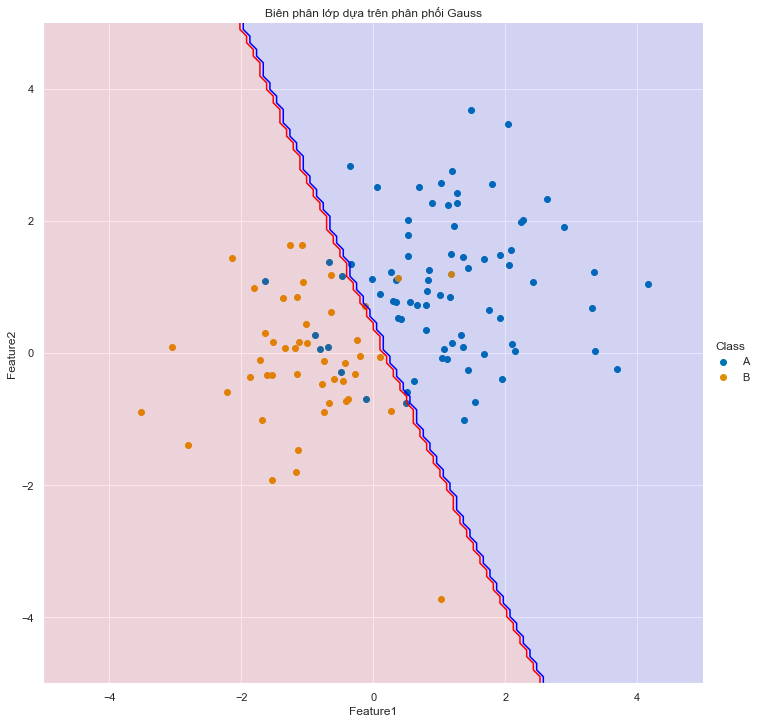

In [36]:
#Plot with boundary contours
N = 100
X = np.linspace(-5, 5, N)
Y = np.linspace(-5, 5, N)
X, Y = np.meshgrid(X, Y)

#Configure plot
color_list = ['Blues','Reds']
g = sns.FacetGrid(test_set, hue="Class", height=10, palette = 'colorblind', hue_order=["A","B"]).map(plt.scatter,
                                                                            "Feature1","Feature2",).add_legend()
my_ax = g.ax

#Computing the predicted class function for each value on the grid
zz = np.array( [DF( np.array([xx,yy]).reshape(-1,1),mu_list, cov_list, pi_list) for xx, yy in zip(np.ravel(X), 
                                                                                                  np.ravel(Y)) ] )
# zz = np.array( [predict_NB_gaussian_class( np.array([xx,yy]).reshape(-1,1),mu_list, std_list, pi_list) 
# for xx, yy in zip(np.ravel(X), np.ravel(Y)) ] )

#Reshaping the predicted class into the meshgrid shape
Z = zz.reshape(X.shape)

#Plot the filled and boundary contours
my_ax.contourf( X, Y, Z, 1, alpha = .1, colors = ('blue','red'))
my_ax.contour( X, Y, Z, 1, alpha = 1, colors = ('blue','red'))

# Addd axis and title
my_ax.set_xlabel('Feature1')
my_ax.set_ylabel('Feature2')
my_ax.set_title('Biên phân lớp dựa trên phân phối Gauss')
plt.show()

In [37]:
#Split train and test
train_set, test_set = train_test_split(classAB, train_size=0.8)
print("Số lượng của tập train là :",len(train_set))
print("Số lượng của tập train là :",len(test_set))

Số lượng của tập train là : 396
Số lượng của tập train là : 99


In [38]:
#Estimating the parameters
mu_list = np.split(train_set.groupby('Class').mean().values,[1])
# cov_list = np.split(np.array([1,0,0,1]*2).reshape(-1,2),[2])
cov_list = np.split(train_set.groupby('Class').cov().values,[2])
pi_list = train_set.iloc[:,0].value_counts().values / len(train_set)
print("Mean của từng class A trong train set là : ",mu_list[0][0])
print("Mean của từng class B trong train set là : ",mu_list[1][0])

Mean của từng class A trong train set là :  [1.00020499 0.9389721 ]
Mean của từng class B trong train set là :  [-1.10655257 -0.09811678]


In [39]:
#Confusion matrix
prediction = ["A" if DF(np.array([x,y]).reshape(-1,1),mu_list, cov_list, pi_list)==0 else "B" 
                                      for x, y in test_set[["Feature1","Feature2"]].values]
label = list(test_set['Class'].values)
print(pd.DataFrame(confusion_matrix(label, prediction), index=['Class A', 'Class B'], 
                                                       columns=['Class A', 'Class B']))

         Class A  Class B
Class A       48        6
Class B        7       38


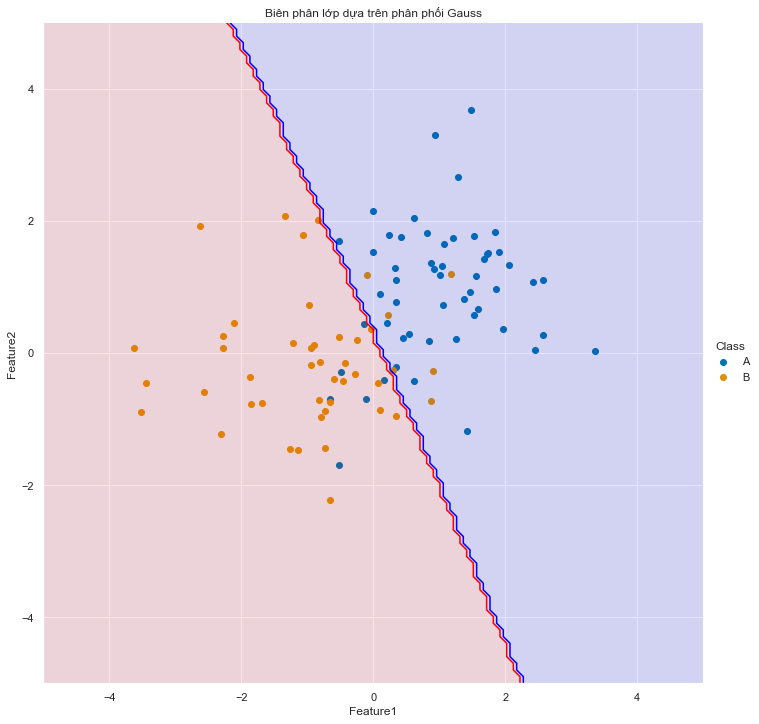

In [40]:
#Plot with boundary contours
N = 100
X = np.linspace(-5, 5, N)
Y = np.linspace(-5, 5, N)
X, Y = np.meshgrid(X, Y)

#Configure plot
color_list = ['Blues','Reds']
g = sns.FacetGrid(test_set, hue="Class", height=10, palette = 'colorblind', hue_order=["A","B"]).map(plt.scatter,
                                                                            "Feature1","Feature2",).add_legend()
my_ax = g.ax

#Computing the predicted class function for each value on the grid
zz = np.array( [DF( np.array([xx,yy]).reshape(-1,1),mu_list, cov_list, pi_list) for xx, yy in zip(np.ravel(X), 
                                                                                                  np.ravel(Y)) ] )
# zz = np.array( [predict_NB_gaussian_class( np.array([xx,yy]).reshape(-1,1),mu_list, std_list, pi_list) 
# for xx, yy in zip(np.ravel(X), np.ravel(Y)) ] )

#Reshaping the predicted class into the meshgrid shape
Z = zz.reshape(X.shape)

#Plot the filled and boundary contours
my_ax.contourf( X, Y, Z, 1, alpha = .1, colors = ('blue','red'))
my_ax.contour( X, Y, Z, 1, alpha = 1, colors = ('blue','red'))

# Addd axis and title
my_ax.set_xlabel('Feature1')
my_ax.set_ylabel('Feature2')
my_ax.set_title('Biên phân lớp dựa trên phân phối Gauss')
plt.show()